# Anime Recommender
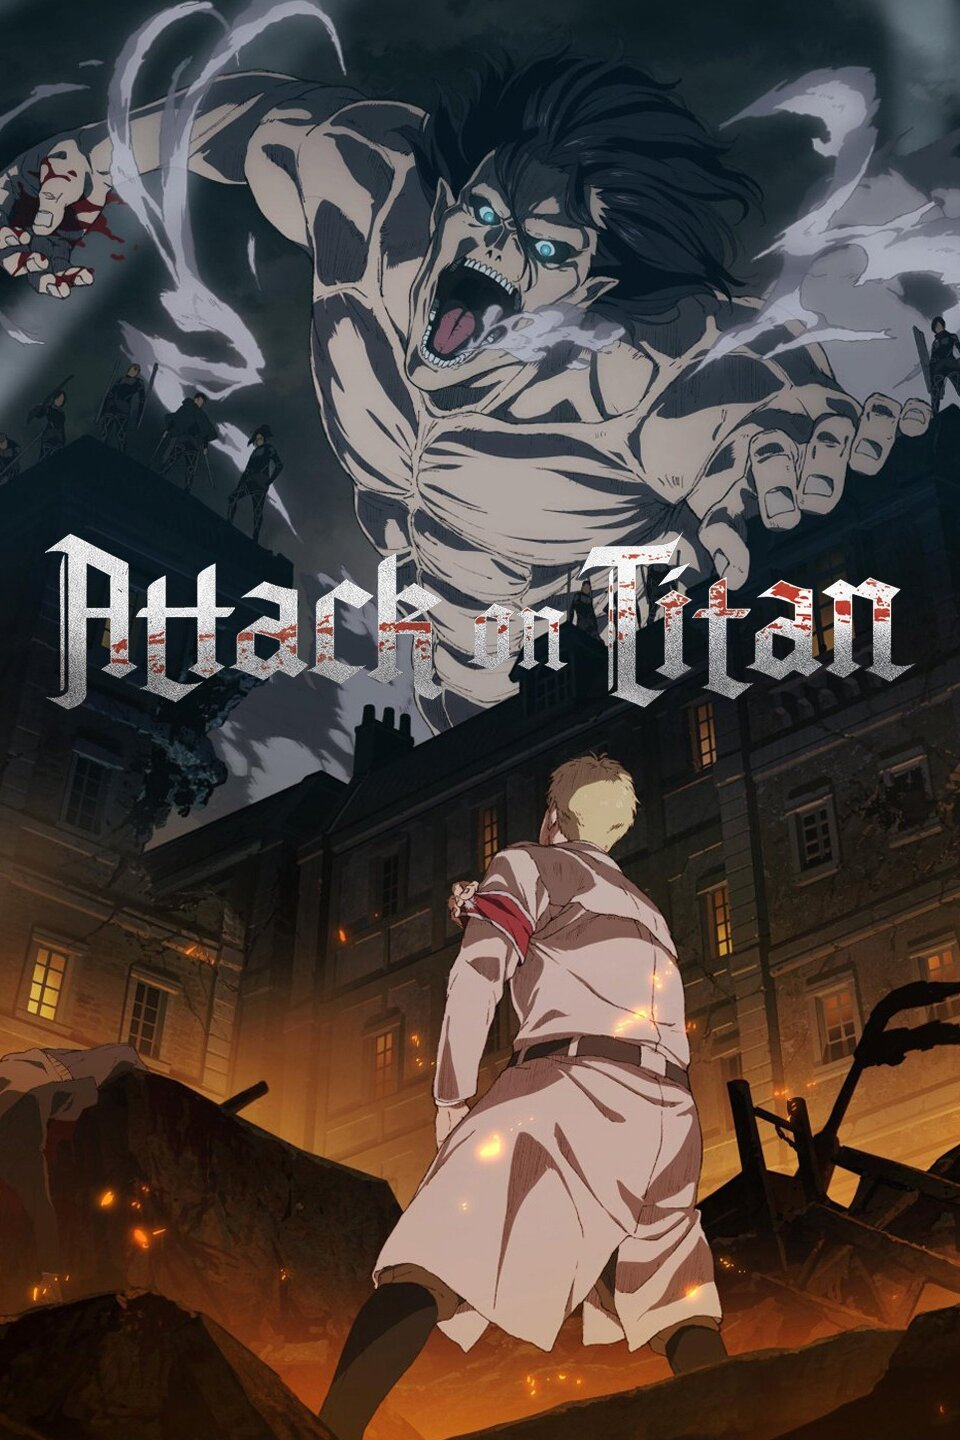

Importing libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data set

In [204]:
df=pd.read_csv("anime.csv")
pd.set_option('display.max_colwidth',max(df['Anime Title'].str.len()))
df.head()

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,Manga,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812,"""In order for something to be obtained, something of equal value must be lost.""\n\r\nAlchemy is ..."
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909,The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in A...
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,Manga,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the fun-loving but broke members of the Yorozuya team! ..."
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_Hunter_2011,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492,Hunter x Hunter is set in a world where Hunters exist to perform all manner of dangerous tasks l...
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_Densetsu,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100,"The 150-year-long stalemate between the two interstellar superpowers, the Galactic Empire and th..."


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Anime Title  10000 non-null  object 
 1   MAL Url      10000 non-null  object 
 2   English      4983 non-null   object 
 3   Japanese     9993 non-null   object 
 4   Type         10000 non-null  object 
 5   Episodes     10000 non-null  object 
 6   Status       10000 non-null  object 
 7   Aired        10000 non-null  object 
 8   Premiered    3681 non-null   object 
 9   Broadcast    3681 non-null   object 
 10  Producers    6261 non-null   object 
 11  Licensors    3617 non-null   object 
 12  Studios      8030 non-null   object 
 13  Source       10000 non-null  object 
 14  Genres       10000 non-null  object 
 15  Duration     10000 non-null  object 
 16  Rating       10000 non-null  object 
 17  Score        10000 non-null  float64
 18  Ranking      10000 non-null  int64  
 19  Popul

In [206]:
df.describe()

,Score,Ranking,Popularity,Members,Favorites
count,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,6.707833,5000.50000,5847.746000,5.417796e+04,717.503900
std,0.763715,2886.89568,3777.825526,1.462541e+05,4844.106062
min,5.240000,1.00000,1.000000,1.690000e+02,0.000000
25%,6.140000,2500.75000,2556.750000,1.704000e+03,2.000000
50%,6.670000,5000.50000,5429.500000,7.221000e+03,12.000000
75%,7.260000,7500.25000,9010.250000,3.720600e+04,100.250000
max,9.220000,10000.00000,15133.000000,2.331023e+06,167812.000000


In [207]:
df.columns

Index(['Anime Title', 'MAL Url', 'English', 'Japanese', 'Type', 'Episodes',
       'Status', 'Aired', 'Premiered', 'Broadcast', 'Producers', 'Licensors',
       'Studios', 'Source', 'Genres', 'Duration', 'Rating', 'Score', 'Ranking',
       'Popularity', 'Members', 'Favorites', 'Summary'],
      dtype='object')

Data cleaning and processing

In [208]:
#dropping unnecessary columns
df=df.drop(['MAL Url','Japanese', 'Status', 'Aired', 'Premiered', 'Broadcast', 'Producers', 'Licensors',
],axis=1)

In [209]:
df.isna().sum()

Anime Title       0
English        5017
Type              0
Episodes          0
Studios        1970
Source            0
Genres            0
Duration          0
Rating            0
Score             0
Ranking           0
Popularity        0
Members           0
Favorites         0
Summary           0
dtype: int64

In [210]:
#dropping columns with null vaules but not studios as we will need it later
df=df.drop(['English'],axis=1)

In [211]:
df.dtypes

Anime Title     object
Type            object
Episodes        object
Studios         object
Source          object
Genres          object
Duration        object
Rating          object
Score          float64
Ranking          int64
Popularity       int64
Members          int64
Favorites        int64
Summary         object
dtype: object

In [212]:
df.Episodes.unique()

array(['64', '24', '51', '148', '110', '10', '13', '22', '1', '12', '201',
       '7', '25', '14', '26', '75', '74', '4', '11', '43', '47', '27',
       '39', '37', '101', '99', '23', '15', 'Unknown', '120', '50', '2',
       '112', '62', '8', '6', '52', '1787', '19', '9', '195', '21', '46',
       '78', '20', '3', '40', '142', '100', '45', '72', '61', '49', '42',
       '48', '17', '36', '147', '73', '127', '5', '150', '16', '29',
       '115', '30', '53', '76', '124', '224', '18', '140', '131', '33',
       '94', '79', '77', '203', '96', '154', '58', '35', '44', '34', '67',
       '178', '276', '172', '128', '102', '93', '41', '86', '92', '105',
       '97', '38', '330', '137', '91', '191', '59', '60', '65', '180',
       '243', '55', '66', '192', '193', '153', '104', '56', '54', '291',
       '70', '500', '28', '63', '103', '109', '32', '258', '296', '80',
       '146', '182', '694', '68', '117', '114', '108', '69', '145', '220',
       '31', '331', '130', '170', '214', '151', '95',

We can see that Episodes column is of type object and there is an unknown value , we need to convert the data type to Integer

In [213]:
df.Episodes=df.Episodes.replace(to_replace='Unknown',value='0')

In [214]:
df.Episodes.unique()

array(['64', '24', '51', '148', '110', '10', '13', '22', '1', '12', '201',
       '7', '25', '14', '26', '75', '74', '4', '11', '43', '47', '27',
       '39', '37', '101', '99', '23', '15', '0', '120', '50', '2', '112',
       '62', '8', '6', '52', '1787', '19', '9', '195', '21', '46', '78',
       '20', '3', '40', '142', '100', '45', '72', '61', '49', '42', '48',
       '17', '36', '147', '73', '127', '5', '150', '16', '29', '115',
       '30', '53', '76', '124', '224', '18', '140', '131', '33', '94',
       '79', '77', '203', '96', '154', '58', '35', '44', '34', '67',
       '178', '276', '172', '128', '102', '93', '41', '86', '92', '105',
       '97', '38', '330', '137', '91', '191', '59', '60', '65', '180',
       '243', '55', '66', '192', '193', '153', '104', '56', '54', '291',
       '70', '500', '28', '63', '103', '109', '32', '258', '296', '80',
       '146', '182', '694', '68', '117', '114', '108', '69', '145', '220',
       '31', '331', '130', '170', '214', '151', '95', '164'

In [298]:
df.Episodes=pd.to_numeric(df.Episodes)
df.Episodes

0        64
1        24
2        51
3       148
4       110
       ... 
9995      1
9996      1
9997      1
9998      1
9999     44
Name: Episodes, Length: 10000, dtype: int64

## EDA and Visualization

Top 10 Anime by Popularity

In [216]:
df.sort_values(by=['Popularity'])["Anime Title"].head(10).to_frame()

,Anime Title
58,Death Note
115,Shingeki no Kyojin
1712,Sword Art Online
0,Fullmetal Alchemist: Brotherhood
61,One Punch Man
6665,Tokyo Ghoul
1045,Boku no Hero Academia
1,Steins;Gate
4714,Naruto
980,No Game No Life


In [217]:
df.sort_values(by=['Favorites'],ascending=False)["Anime Title"]

0        Fullmetal Alchemist: Brotherhood
1                             Steins;Gate
3                  Hunter x Hunter (2011)
58                             Death Note
101                             One Piece
                      ...                
8904      Chuuko Video-ya no Onna Tenin X
8903           Canvas: Sepia-iro no Motif
8902                       Bytheway Dance
8901    Bernard-jou Iwaku.: Ofuro Dokusho
8137                     True Tears Recap
Name: Anime Title, Length: 10000, dtype: object

Top 10 animes by Rating

In [218]:
df.sort_values(by=['Rating'],ascending=False)["Anime Title"]

1377                                             Afro Samurai
1958                                        Utawarerumono OVA
8788                                       Ginsoukikou Ordian
7173                 Itsuka Tenma no Kuro Usagi Picture Drama
7175                                   Kenzen Robo Daimidaler
                                ...                          
7283                                     Mafukiden: Pandarian
1864                       Legendz: Yomigaeru Ryuuou Densetsu
7289                                                 Rikaisha
1859    Kazoku Robinson Hyouryuuki: Fushigi na Shima no Flone
7159             Ba La La Xiao Mo Xian Zhi: Meng Huan Xuan Lu
Name: Anime Title, Length: 10000, dtype: object

Animes by Type

TV         3681
Movie      1693
Special    1636
OVA        1567
ONA         868
Music       555
Name: Type, dtype: int64

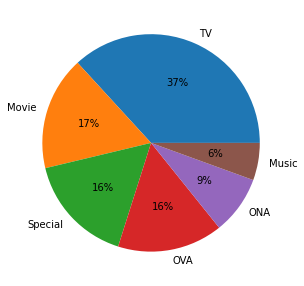

In [219]:
plt.figure(figsize=(5,5))
display(df.Type.value_counts())
plt.pie(df.Type.value_counts(),autopct='%1.0f%%',labels=df.Type.value_counts().index);

In [272]:
new_df=df[df.Type =="TV"]
new_df.Episodes

0        64
1        24
2        51
3       148
5        51
       ... 
9978     13
9983     13
9985     12
9987     10
9999     44
Name: Episodes, Length: 3681, dtype: int64

 Number of Anime(TV Shows only) by Number of Episode

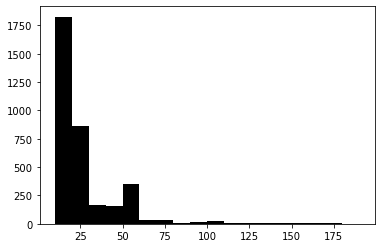

In [297]:
plt.hist(new_df.Episodes,bins=range(10,200,10),color='black');


This graph depicts that a large chunk  of the anime TV series have episodes below 60 .

Animes by Genre
Note: An Anime can have more than one Genre

In [222]:
xyz=df.Genres.str.split(',').explode().value_counts()
xyz

Action        3085
 Comedy       2275
 Fantasy      1954
Comedy        1951
 Shounen      1731
              ... 
Thriller         2
Josei            2
Shounen Ai       2
Samurai          1
Vampire          1
Name: Genres, Length: 79, dtype: int64

# Random Anime recommender

In [223]:
def random(x):
    a=df[['Anime Title','Summary']].sample(x)
    pd.set_option('display.max_colwidth',None)
    display(a)
random(5)    

,Anime Title,Summary
7930,King of Prism: Shiny Seven Stars I - Prologue x Yukinojou x Taiga,The first movie in the four-part King of Prism: Shiny Seven Stars movie series.
8536,Detective Conan Movie 17: Private Eye in the Distant Sea,"The movie is set on a state-of-the art Aegis vessel with the full cooperation of Japan's real-life Ministry of Defense and Maritime Self-Defense Force. The corpse of a Self-Defense Force member has been found—minus the left arm—and a spy has infiltrated the Aegis vessel. The heroine Ran is put in jeopardy, and Conan is forced to stand up against the dangerous Spy ""X.""\n\r\n(Source: ANN)"
1283,Pale Cocoon,"A future where the continuity of history has broken off, a world of enormous ruins that continues endlessly. Oceans and continents have vanished, existing only within the archives brought up from the remains. Ura works in the Archive Excavation Department, which restores and analyzes the data left behind. One day, he finds a disturbing visual record... \n\r\n(Source: ANN)"
1637,Watashi ni Tenshi ga Maiorita! Special,"Hinata Hoshino, Hana Shirosaki, and Noa Himesaka are off to the countryside for a camping trip. At Hinata's behest, her elder sister, Miyako, reluctantly tags along. Seeing how gloomy Miyako is, the trio do their best to get her to enjoy herself too.\n\r\nBesides the camping trip, Watashi ni Tenshi ga Maiorita! Special contains three more short stories of the girls. Although their lives seem normal, one thing is certain: there is definitely no shortage of cuteness here!\n\r\n[Written by MAL Rewrite]"
8077,The iDOLM@STER Million Live! 1st Anniversary PV,No synopsis information has been added to this title. Help improve our database by adding a synopsis here.


# Genre based Anime Recommender

In [274]:
genre=input("Enter the genre ")
def genrebased(genre):
    recomm=df[df["Genres"].str.contains((genre), regex=True)]
    recomm=recomm[['Anime Title','Type','Summary']]
    display(recomm.sample(5))
    


Enter the genre Drama


In [275]:
genrebased(genre='Drama')

,Anime Title,Type,Summary
9939,Ki Renka,Movie,Independent animation by Hayashi Seiichi.
2325,Yuugo: Koushounin,TV,"""Negotiation means, you turn words into weapons""\n\r\nThis is the realization of the popular comic Yu-go that was published in Kondasha Afternoon Magazine over a period of 10 years.\n\r\nBeppu Yuugo is the world's most successfull negotiator. His only weapons are ""words."" Yuugo doesn't kill people. Neither does he threaten them with brute violence. With rich knowledge and a calm judgement, he believes in the humans inside them. Doing only that he has managed many dangerous negotiations successfully until now. Now two of the many episodes have been chosen very carefully, one taking place in Russia, the other one in Pakistan. In the burning desert and the freezing Siberia Yuugo begins his negotiations.\n\r\n(Source: AniDB)"
8345,Kigyou Senshi Yamazaki: Long Distance Call,OVA,A 42-year-old salaryman is made to serve his company beyond the grave when his brain is installed in a super-powered android body in order to carry out corporate espionage.\n\r\n(Source: Anime Encyclopedia)
7566,Sengoku☆Paradise Kiwami,TV,"Based on the online mobile phone otome game ""Sengoku☆Paradise"".\n\nThe first 3 minutes of the 10 minute spot for Sengoku☆Paradise Kiwami is the anime. The rest of the 7 minutes is of Sengoku☆Paradise Kiwami cast members Daisuke Namikawa and others (first time with Tetsuya Kakihara, second time with Rei Mochizuki) going on missions, plus an informative short."
7011,Jetter Mars,TV,"In 2015 A.D., Dr. Yamanoue, the Secretary of the Science Ministry, who devotes himself assembles the Android robot on an artificial island. He intends to live together with him as his own son. But the robot has a deficiency in his electric brain. He comes to the conclusion that Dr. Kawashimo's help is essential to correct his defective rain. Although they are friends, they are rivals not only in private life but also in scientific study. Dr. Yamanoue is very jingoistic and only thinks of the robot as one of his strategic arms. On the contrary, Dr. Kawashimo is a pacifist and devotes his affection to robots.\n\r\nDr. Kawashimo hurries to the island on request of Dr. Yamanoue, taking his pretty young daughter Miri with him. Arriving on the island, Dr. Kawashimo sets the electric brain into Jet Mars, a robot boy. Thus Mars comes into the world. Everything is new to Mars and he doesn't know what is good or bad. On the next day he lifts Dr. Kawashimo and Miri up onto the building. When he sees a glint of moisture in Miri's eyes, he has a mysterious feeling in his mind. Then he asks Dr. Yamanoue what it is. He is taught that it is a tear a weak girl sheds, but, a strong man never does.\n\r\nOne day, the electric brain of Fainton, another robot, is put out of order. So Fainton goes-on a wild rampage and the island is plunged into a crisis. When the seawater runs into the facilities from the big hole made by Fainton, only Mars stands in amazement and is quite at a loss what to do just then Miri exhibits her ultra ability and covers the big hole. Led by her, Mars also carries a sheet of iron and makes repairs. At last they rescue Dr. Yamanoue and Dr. Kawashimo from being washed by seawater. Miri is the robot made by Dr. Kawashimo. Mars learns how to cry and learns how to perform a kind deed.\n\r\n(Source: Tezuka Production, Toei Animation)"


In [276]:
genrebased(genre='Comedy')

,Anime Title,Type,Summary
9411,Otona no Bouguya-san (Rimen),ONA,No synopsis information has been added to this title. Help improve our database by adding a synopsis here.
9606,Cutie Honey Universe,TV,"The forces of evil are on the rise. When the evil mastermind Sister Jill transforms one of her girls into the bestial Breast Claw and sends her minions out on a mission involving the group Panther Claw and a jewelry store heist, Honey Kisaragi departs from her Catholic girls' school to confront the threat as Cutie Honey. But that's exactly what Sister Jill wants, as she desires Honey's Airborne Element Fixing Device, which allows her to transform into Honey's seven different forms. Meanwhile, Sister Jill is also on the scene in disguise as Inspector Genet, trying to worm her way into Honey's confidence from a different angle.\n\r\n(Source: ANN)"
922,Rurouni Kenshin: Meiji Kenkaku Romantan,TV,"In the final years of the Bakumatsu era lived a legendary assassin known as Hitokiri Battousai. Feared as a merciless killer, he was unmatched throughout the country, but mysteriously disappeared at the peak of the Japanese Revolution. It has been ten peaceful years since then, but the very mention of Battousai still strikes terror into the hearts of war veterans.\n\r\nUnbeknownst to them, Battousai has abandoned his bloodstained lifestyle in an effort to repent for his sins, now living as Kenshin Himura, a wandering swordsman with a cheerful attitude and a strong will. Vowing never to kill again, Kenshin dedicates himself to protecting the weak. One day, he stumbles across Kaoru Kamiya at her kendo dojo, which is being threatened by an impostor claiming to be Battousai. After receiving help from Kenshin, Kaoru allows him to stay at the dojo, and so the former assassin temporarily ceases his travels.\n\nRurouni Kenshin: Meiji Kenkaku Romantan tells the story of Kenshin as he strives to save those in need of saving. However, as enemies from both past and present begin to emerge, will the reformed killer be able to uphold his new ideals?\n\r\n[Written by MAL Rewrite]"
8475,InuYasha: Kuroi Tessaiga,Special,"A 30-minute Inuyasha feature titled Kuroi Tessaiga screened on Takahashi Rumiko's picture exhibitions across Japan.\n\r\nIn January 2010, this special ended up, slightly edited, as episode 15 of Inuyasha Kanketsu-hen."
1626,Shaman King Specials,Special,"Throughout the broadcast of Shaman King, many shorts (usually referred to as Shaman King omake and TV specials) were made on special days of the year related to spirits and the like. The omake were short stories that were made for humorous effect. Apparently, all of the omake fit into the story before the Shaman Fight 2nd round. Documents of the Shaman Fight was shown with a New Year's omake as well. The TV Specials were aired after specific points of the story as well as on holidays. The specials were never dubbed in English, and, most likely, never will be. \n\r\n(Source: Wikipedia)"


# Anime by Same studios

In [300]:
df['Studios'].unique()

array(['Bones', 'White Fox', 'Bandai Namco Pictures', 'Madhouse',
       'Artland,       Magic Bus', 'Sunrise', 'Wit Studio', 'Shaft',
       'Kyoto Animation', 'CoMix Wave Films', 'Production I.G',
       'Studio Ghibli', 'A-1 Pictures', 'Studio Deen', 'Kinema Citrus',
       'Artland', 'ufotable', 'Haoliners Animation League', 'CloverWorks',
       'Studio Pierrot', "Brain's Base", 'Tokyo Movie Shinsha', 'Gainax',
       'Studio Chizu', 'Shuka', 'David Production',
       'Tatsunoko Production', 'Madhouse,       MAPPA', 'Studio VOLN',
       'J.C.Staff', 'Lerche', 'TMS Entertainment', 'Hal Film Maker',
       'Toei Animation', 'Gainax,       Production I.G',
       'J.C.Staff,       Egg Firm', 'feel.', 'B.CMAY PICTURES',
       'Manglobe', 'OLM', 'SynergySP', 'P.A. Works', 'Platinum Vision',
       'Orange', 'Nippon Animation', 'Studio Signpost', 'Zero-G',
       'Madhouse,       Satelight,       Graphinica',
       'Studio Hibari,       Topcraft', 'MAPPA', 'Studio Gokumi',
       'S

In [299]:
name_stud=input("Enter the name of studios ")
studiob=df[df['Studios']==name_stud]
studiob[['Anime Title','Summary']].head(5)

Enter the name of studios MAPPA


,Anime Title,Summary
151,Banana Fish,"Aslan Jade Callenreese, known as Ash Lynx, was a runaway picked off the streets of New York City and raised by the infamous godfather of the mafia, Dino Golzine. Now 17 years old and the boss of his own gang, Ash begins investigating the mysterious ""Banana Fish""—the same two words his older brother, Griffin, has muttered since his return from the Iraq War. However, his inquiries are hindered when Dino sends his men after Ash at an underground bar he uses as a hideout.\n\r\nAt the bar, Skip, Ash's friend, introduces him to Shunichi Ibe and his assistant, Eiji Okumura, who are Japanese photographers reporting on American street gangs. However, their conversation is interrupted when Shorter Wong, one of Ash's allies, calls to warn him about Dino. Soon, Dino's men storm the bar, and in the ensuing chaos kidnap Skip and Eiji. Now, Ash must find a way to rescue them and continue his investigation into Banana Fish, but will his history with the mafia prevent him from succeeding?\n\r\n[Written by MAL Rewrite]"
197,Shingeki no Bahamut: Genesis,"Thousands of years ago, the ancient dragon Bahamut wrought havoc upon the land of Mistarcia, a world where both gods and demons live amongst mankind. Working together to prevent the world's destruction, the rival deities barely managed to seal Bahamut, agreeing to split the key between them so that the dragon would remain eternally imprisoned.\n\r\nWith the world safe from the destruction of Bahamut, it is business as usual for bounty hunters like Favaro Leone. Living a laid-back, self-serving lifestyle, the amoral Favaro goes about his work while on the run from fellow bounty hunter Kaisar Lidfard, a righteous man who swears vengeance upon Favaro. However, Favaro's carefree life is thrown into chaos when he meets Amira, a mysterious woman who holds half of the key to the world's fragile peace.\n\nShingeki no Bahamut: Genesis tells the story of a group of unlikely heroes who find themselves caught in the middle of an epic clash between gods and demons, forced to carve their own path in the face of the imminent storm.\n\r\n[Written by MAL Rewrite]"
319,Garo Movie: Divine Flame,"Leon, who has succeeded the name of Golden Knight ""GARO,"" devotes himself to train a young Makai Knight for the next generation, together with Prince Alfonso of the Valiante Kingdom. Then, they receive an order to exterminate the most beautiful Horror in the world which resides in a neighboring country ""Vazelia."" At the same time, a young Makai Knight for the next generation is kidnapped by an unknown person. Leon desperately follows them, only to find that he is surrounded by his enemies at a dead end. Then, a Makai Knight Dario who was supposed to be missing for some time suddenly appears and rescues him. Under his guidance, Leon is led to the town where he meets up a totally unexpected person.\n\r\n(Source: ANN)"
574,Zombieland Saga,"Sakura Minamoto dreams of becoming an idol. Unfortunately, reality hits her like a truck, and she dies in a sudden traffic accident. Ten years later, she wakes up in Saga Prefecture, only to find herself a zombie with no memory of her past. While still coming to terms with her demise, she meets a man named Koutarou Tatsumi, who explains that he has resurrected her and six other zombie girls from different eras for the purpose of economically revitalizing Saga by means of an idol group. Assuming the role of an abrasive manager, Koutarou begins scheduling events; the girls go along with it, eventually deciding to name their idol group Franchouchou.\n\r\nAn absurdly comedic take on the idol genre, Zombieland Saga tells the story of Franchouchou's heartwarming struggle to save Saga Prefecture while hiding their zombie identities and rediscovering their past lives.\n\r\n[Written by MAL Rewrite]"
579,Shoukoku no Altair,"Tughril Mahmut is a young pasha serving on the Divan of the Türkiye Stratocracy. The clouds of war are gathering over his country due t

# Story based Anime recommender

TD-IDF Vectorizer Implementation

In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
tf_idf = TfidfVectorizer(lowercase=True, stop_words = 'english')
tf_idf_matrix = tf_idf.fit_transform(df['Summary'])
tf_idf_matrix.shape

(10000, 37426)

Cosine similarity Implementation

In [280]:
cosine_similarity =linear_kernel(tf_idf_matrix ,tf_idf_matrix)

In [284]:
#indices = pd.Series(dfa['Anime Title'].index)
def recommend(title, cosine_sim=cosine_similarity):
  id= df[df['Anime Title'] == title].index[0]
  

  
  similarity_scores = list(enumerate(cosine_sim[id]))
  similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
  similarity_scores = similarity_scores[1:11]

  
  anime_index = [i[0] for i in similarity_scores]

  
  recomm=df[['Anime Title','Type','Summary']].loc[anime_index]
  pd.set_option('display.max_colwidth',None)
  
  print("Animes like {} are".format(title))

  
  display(recomm)

In [285]:
recommend('Kiseijuu: Sei no Kakuritsu')

Animes like Kiseijuu: Sei no Kakuritsu are


,Anime Title,Type,Summary
911,Nodame Cantabile,TV,"Shinichi Chiaki is a first class musician whose dream is to play among the elites in Europe. Coming from a distinguished family, he is an infamous perfectionist—not only is he highly critical of himself, but of others as well. The only thing stopping Shinichi from leaving for Europe is his fear of flying. As a result, he's grounded in Japan.\n\r\nDuring his fourth year at Japan's top music university, Shinichi happens to meet Megumi Noda or, as she refers to herself, Nodame. On the surface, she seems to be an unkempt girl with no direction in life. However, when Shinichi hears Nodame play the piano for the first time, he is in awe of the kind of music she creates. Nevertheless, Shinichi is dismayed to discover that Nodame is his neighbor, and worse, she ends up falling head over heels in love with him.\n\r\n[Written by MAL Rewrite]"
857,Detective Conan Magic File 3: Shinichi and Ran - Memories of Mahjong Tiles and Tanabata,OVA,Another Shinichi and Ran pre-story.
6570,Detective Conan Movie 01: The Timed Skyscraper,Movie,"Conan Edogawa is facing a dilemma: Ran Mouri has asked Shinichi Kudou out to the movies and he is unable to provide a convincing excuse not to go. However, when the day of the date arrives, he has more pressing problems to worry about—a great amount of plastic explosives has recently been stolen and the culprit has challenged Shinichi to find and dispose of the bombs he has scattered across the city. Now forced in a race against time, Conan must not only protect the city, but also figure out who the mastermind is and his reason for confronting Shinichi.\n\r\n[Written by MAL Rewrite]"
969,Detective Conan Movie 13: The Raven Chaser,Movie,"Kudou Shinichi is living his life as Edogawa Conan, but those days seem like they might end pretty soon. The Black Syndicate is coming dangerously close to learning the truth about Shinichi having survived. Conan and everybody around him may end up dead if he doesn't manage to find Irish—a member of the Black Organization who has infiltrated the police forces, currently investigating a big serial murder case."
1047,Detective Conan,TV,"Shinichi Kudou, a high school student of astounding talent in detective work, is well known for having solved several challenging cases. One day, when Shinichi spots two suspicious men and decides to follow them, he inadvertently becomes witness to a disturbing illegal activity. Unfortunately, he is caught in the act, so the men dose him with an experimental drug formulated by their criminal organization, leaving him to his death. However, to his own astonishment, Shinichi lives to see another day, but now in the body of a seven-year-old child.\n\r\nPerfectly preserving his original intelligence, he hides his real identity from everyone, including his childhood friend Ran Mouri and her father, private detective Kogorou Mouri. To this end, he takes on the alias of Conan Edogawa, inspired by the mystery writers Arthur Conan Doyle and Ranpo Edogawa.\n\nDetective Conan follows Shinichi who, as Conan, starts secretly solving the senior Mouri's cases from behind the scenes with his still exceptional sleuthing skills, while covertly investigating the organization responsible for his current state, hoping to reverse the drug's effects someday.\n\r\n[Written by MAL Rewrite]"
9700,Majuu Sensen: The Apocalypse,TV,"An entire city is destroyed by two monstrous and omnipotent beings. Genzou Kuruma, a scientist but also the leader of a sect wishes to awake God, but first, he needs a special kind of blood for it. His son, Shinichi Kuruma, and a young girl, Ayaka Sanders, possess that blood, and he will do anything to capture them and take their blood for God's Awakening, and so, humanity will be lost. Shinichi, along Ayaka and Tomizoro (Tommy), are escaping from Genzou Kuruma's ""New Humans"" (genetically altered humans who can turn into monsters), while Shinichi only wishes for revenge against his father. He, lik

In [287]:
recommend("Fullmetal Alchemist: Brotherhood")

Animes like Fullmetal Alchemist: Brotherhood are


,Anime Title,Type,Summary
1028,Fullmetal Alchemist,TV,"Edward Elric, a young, brilliant alchemist, has lost much in his twelve-year life: when he and his brother Alphonse try to resurrect their dead mother through the forbidden act of human transmutation, Edward loses his brother as well as two of his limbs. With his supreme alchemy skills, Edward binds Alphonse's soul to a large suit of armor.\n\r\nA year later, Edward, now promoted to the fullmetal alchemist of the state, embarks on a journey with his younger brother to obtain the Philosopher's Stone. The fabled mythical object is rumored to be capable of amplifying an alchemist's abilities by leaps and bounds, thus allowing them to override the fundamental law of alchemy: to gain something, an alchemist must sacrifice something of equal value. Edward hopes to draw into the military's resources to find the fabled stone and restore his and Alphonse's bodies to normal. However, the Elric brothers soon discover that there is more to the legendary stone than meets the eye, as they are led to the epicenter of a far darker battle than they could have ever imagined.\n\r\n[Written by MAL Rewrite]"
474,Fullmetal Alchemist: The Conqueror of Shamballa,Movie,"In desperation, Edward Elric sacrificed his body and soul to rescue his brother Alphonse, and is now displaced in the heart of Munich, Germany. He struggles to adapt to a world completely foreign to him in the wake of the economic crisis that followed the end of World War I. Isolated and unable to return home with his alchemy skills, Edward continues to research other methods of escaping the prison alongside colleagues who bear striking resemblances to many of the people he left behind. As dissent brews among the German citizenry, its neighbors also feel the unrest of the humiliated nation.\n\r\nMeanwhile, Alphonse continues to investigate Edward's disappearance, delving into the science of alchemy in the hopes of finally reuniting with his older brother. \n\r\n[Written by MAL Rewrite]"
1501,Fullmetal Alchemist: The Sacred Star of Milos,Movie,"Chasing a runaway alchemist with strange powers, brothers Edward and Alphonse Elric stumble into the squalid valley of the Milos. The Milosians are an oppressed group that seek to reclaim their holy land from Creta: a militaristic country that forcefully annexed their nation. In the eye of the political storm is a girl named Julia Crichton, who emphatically wishes for the Milos to regain their strength and return to being a nation of peace.\n\r\nBefriending the girl, Edward and Alphonse find themselves in the midst of a rising resistance that involves the use of the very object they have been seeking all along—the Philosopher's Stone. However, their past experiences with the stone cause them reservation, and the brothers are unwilling to help.\n\r\nBut as they discover the secrets behind Creta's intentions and questionable history, the brothers are drawn into the battle between the rebellious Milos, who desire their liberty, and the Cretan military, who seek absolute power.\n\r\n[Written by MAL Rewrite]"
3116,Fullmetal Alchemist: The Sacred Star of Milos Specials,ONA,"To mark the July 2 opening of the Fullmetal Alchemist: The Sacred Star of Milos film, the Pia Eiga Seikatsu website posted an exclusive video ""interview"" with the stars of the film, Edward and Alphonse Elric (as voiced by Romi Park and Rie Kugimiya, respectively). In keeping with the spirit of Hiromu Arakawa's original manga and the two television anime, the interviewer has trouble early on in figuring out who the ""Fullmetal Alchemist"" is. (The interview has cameos by the other stars of the anime.) Also includes 3 ""Study"" sessions with ""Professor"" Mustang, teaching Winry and Hawkeye about Creta and Milos."
2963,Fullmetal Alchemist: Brotherhood Specials,Special,"Amazing secrets and startling facts are exposed for the first time in the Fullmetal Alchemist: Brotherhood OVA Collection, a new assortment of stories set in neve

In [288]:
recommend('Naruto')

Animes like Naruto are


,Anime Title,Type,Summary
2839,Naruto: Shippuuden,TV,"It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled his desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the safety of the entire shinobi world.\n\r\nAlthough Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunctious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy who wishes to become Hokage.\n\r\n[Written by MAL Rewrite]"
8145,Boruto: Naruto Next Generations,TV,"Following the successful end of the Fourth Shinobi World War, Konohagakure has been enjoying a period of peace, prosperity, and extraordinary technological advancement. This is all due to the efforts of the Allied Shinobi Forces and the village's Seventh Hokage, Naruto Uzumaki. Now resembling a modern metropolis, Konohagakure has changed, particularly the life of a shinobi. Under the watchful eye of Naruto and his old comrades, a new generation of shinobi has stepped up to learn the ways of the ninja.\n\r\nBoruto Uzumaki is often the center of attention as the son of the Seventh Hokage. Despite having inherited Naruto's boisterous and stubborn demeanor, Boruto is considered a prodigy and is able to unleash his potential with the help of supportive friends and family. Unfortunately, this has only worsened his arrogance and his desire to surpass Naruto which, along with his father's busy lifestyle, has strained their relationship. However, a sinister force brewing within the village may threaten Boruto's carefree life.\n\r\nNew friends and familiar faces join Boruto as a new story begins in Boruto: Naruto Next Generations.\n\r\n[Written by MAL Rewrite]"
229,Naruto: Shippuuden Movie 6 - Road to Ninja,Movie,"Returning home to Konohagakure, the young ninja celebrate defeating a group of supposed Akatsuki members. Naruto Uzumaki and Sakura Haruno, however, feel differently. Naruto is jealous of his comrades' congratulatory families, wishing for the presence of his own parents. Sakura, on the other hand, is angry at her embarrassing parents, and wishes for no parents at all. The two clash over their opposing ideals, but are faced with a more pressing matter when the masked Madara Uchiha suddenly appears and transports them to an alternate world.\n\r\nIn this world, Sakura's parents are considered heroes—for they gave their lives to protect Konohagakure from the Nine-Tailed Fox attack 10 years ago. Consequently, Naruto's parents, Minato Namikaze and Kushina Uzumaki, are alive and well. Unable to return home or find the masked Madara, Naruto and Sakura stay in this new world and enjoy the changes they have always longed for. All seems well for the two ninja, until an unexpected threat emerges that pushes Naruto and Sakura to not only fight for the Konohagakure of the alternate world, but also to find a way back to their own.\n\r\n[Written by MAL Rewrite]"
2255,"Naruto: Shippuuden - Shippuu! ""Konoha Gakuen"" Den",Special,Naruto school special.\n\r\nNaruto is a new cool student and when he meets Sasuke they start fighting.
595,Boruto: Naruto the Movie,Movie,"The spirited Boruto Uzumaki, son of Seventh Hokage Naruto, is a skilled ninja who possesses the same brashness and passion his father once had. However, the constant absence of his father, who is busy with his Hokage duties, puts a damper on Boruto's fire. Upon learning that his father will watch the aspiring ninjas who will participate in the upcoming Chunin exams, Boruto is driven to prove to him that he is worthy of his attention. In order to do so, he enlists the help of Naruto's childho